In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from shapely.geometry import Point
import geopandas as gpd


def convert_to_gdf(df):
    if "geometry" in df.columns:
        gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry="geometry")
        return gdf
    else:
        geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
        gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

    return gdf

# Premise crowdsourced surveys

Premise crowdsourced surveys are a way of validating, verifying the ground truth and understanding the needs of people on ground, especially in regions impacted by a crisis

In [36]:
community_needs = pd.read_csv("../../data/premise/Community_Needs.csv")
displacement = pd.read_csv("../../data/premise/Displacement.csv")
recent_earthquake = pd.read_csv("../../data/premise/Recent_Earthquake_in_Turkey.csv")
fuel_prices = pd.read_csv("../../data/premise/Premise  Turkey Fuel Prices Update.csv")
household_needs = pd.read_csv("../../data/premise/Premise  Household Needs TR.csv")

In [37]:
def correct_prices(x):
    if x > 2000:
        return x / 100
    elif x < 5:
        return x
    else:
        return x

In [38]:
fuel_prices[" what_is_the_price_of_a_liter_of_petrol"] = fuel_prices[
    " what_is_the_price_of_a_liter_of_petrol"
].apply(lambda x: correct_prices(x))
fuel_prices[" what_is_the_price_of_a_liter_of_diesel"] = fuel_prices[
    " what_is_the_price_of_a_liter_of_diesel"
].apply(lambda x: correct_prices(x))

fuel_prices[" what_is_the_price_of_a_liter_of_petrol"].iloc[13] = 21.43
fuel_prices[" what_is_the_price_of_a_liter_of_diesel"].iloc[10] = 20.51

C:\Users\sahit\AppData\Local\Temp\ipykernel_39692\3926219557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_prices[' what_is_the_price_of_a_liter_of_petrol'].iloc[13]=21.43
C:\Users\sahit\AppData\Local\Temp\ipykernel_39692\3926219557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_prices[' what_is_the_price_of_a_liter_of_diesel'].iloc[10]=20.51


<Axes: >

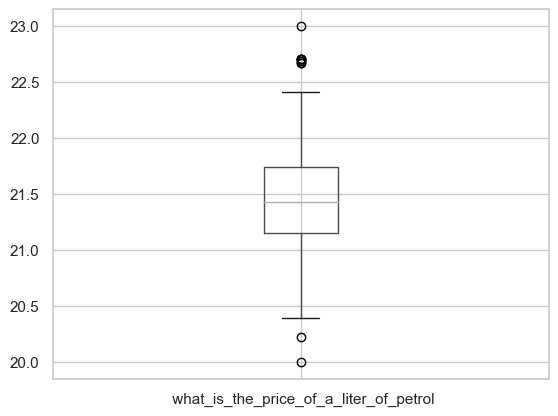

In [39]:
## Verifying the data
fuel_prices[[" what_is_the_price_of_a_liter_of_petrol"]].boxplot()

In [40]:
turkey_adm2 = gpd.read_file(
    "../../data/turkey_administrativelevels0_1_2/tur_polbna_adm2.shp"
)

In [41]:
df = fuel_prices
geometry = [Point(xy) for xy in zip(df.observation_lon, df.observation_lat)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
# gdf = gdf.sjoin(turkey_adm2)

### Price of a litre of petrol

The survey provides data and evidence in the form of photos to capture the price of one litre of petrol and diesel in the areas where the earthquake impact is the highest

<Axes: >

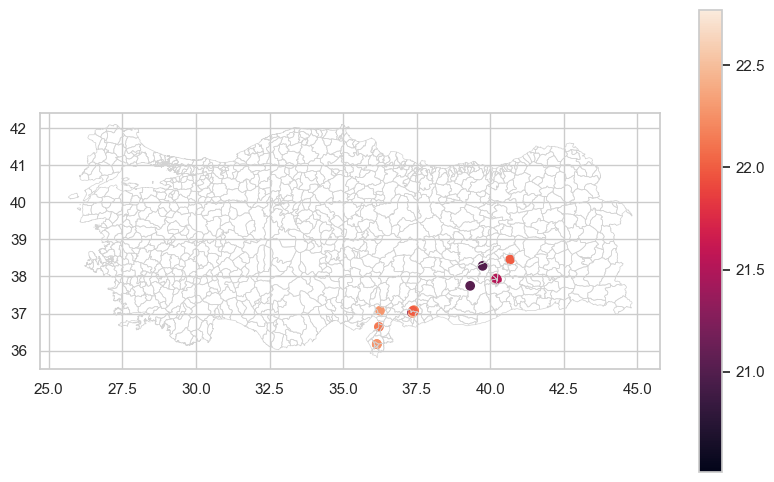

In [42]:
fig, ax = plt.subplots(figsize=(10, 6), sharex=True)

turkey_adm2.boundary.plot(ax=ax, edgecolor="#D3D3D3", linewidth=0.5)
gdf.plot(column=" what_is_the_price_of_a_liter_of_diesel", ax=ax, legend=True)
# gdf.sjoin(turkey_adm2).plot(column=' what_is_the_price_of_a_liter_of_petrol', ax=ax, legend = True)

In [43]:
gdf.rename(
    columns={
        " what_is_the_price_of_a_liter_of_petrol": "Price of Petrol",
        " what_is_the_price_of_a_liter_of_diesel": "Price of Diesel",
    },
    inplace=True,
)

In [44]:
fuel = (
    gdf[["submission_id", "Price of Petrol", "Price of Diesel"]]
    .set_index("submission_id")
    .stack()
    .reset_index()
)
fuel.rename(columns={"level_1": "Type", 0: "Price"}, inplace=True)

### Price of a litre of diesel

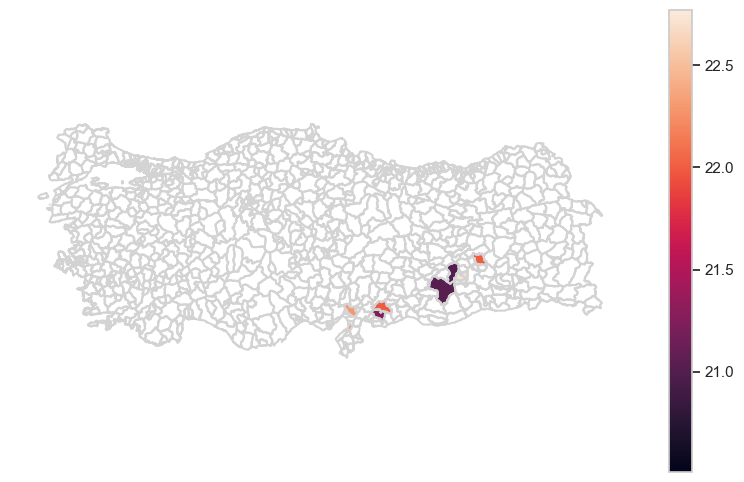

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
turkey_adm2.boundary.plot(ax=ax, color="#d3d3d3")
turkey_adm2.sjoin(gdf).plot(column="Price of Diesel", ax=ax, legend=True)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])


plt.grid(False)

### Comparing the price of petrol and diesel

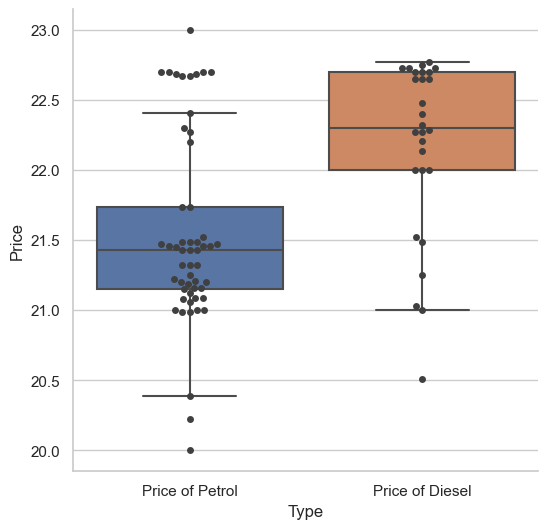

In [49]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))
# gdf[['Price of Diesel', 'Price of Petrol']].boxplot()

sns.set(style="whitegrid")
ax = sns.boxplot(x="Type", y="Price", data=fuel, showfliers=False)
ax = sns.swarmplot(x="Type", y="Price", data=fuel, color=".25")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

## Household Needs Survey from Premise

In [50]:
## Picking the relevant columns
household_columns = [
    " is_the_primary_health_care_facility_closest_to_you_currently_functional",
    " is_the_closest_hospital_to_you_currently_functional",
    "observation_lat",
    "observation_lon",
    " is_the_university_reference_hospital_near_you_functional",
    " do_you_have_access_to_functioning_food_markets",
    " in_the_past_six_months_has_the_amount_of_food_in_your_household_decreased_due_to_a_shortage",
]

In [51]:
df = household_needs
geometry = [Point(xy) for xy in zip(df.observation_lon, df.observation_lat)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

### Exploring the results in the admin region of Sahinbey

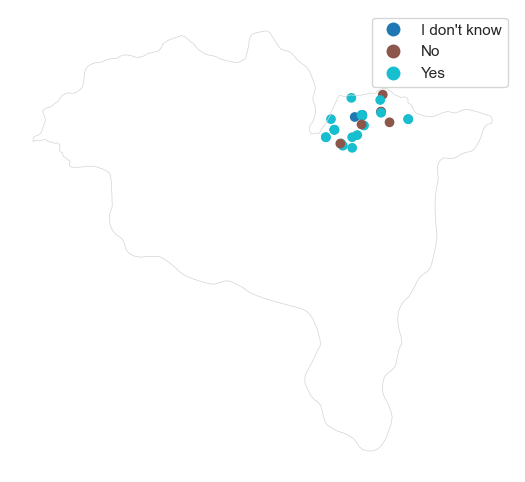

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

turkey_adm2[turkey_adm2["adm2_en"] == "SAHINBEY"].boundary.plot(
    ax=ax, edgecolor="#D3D3D3", linewidth=0.5
)
# gdf.sjoin(turkey_adm2[turkey_adm2['adm2_en']=='SAHINBEY']).plot(ax=ax, column=' is_the_primary_health_care_facility_closest_to_you_currently_functional', legend=True)
gdf.sjoin(turkey_adm2[turkey_adm2["adm2_en"] == "SAHINBEY"]).plot(
    ax=ax, column=" is_the_closest_hospital_to_you_currently_functional", legend=True
)


ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])


plt.grid(False)

In [53]:
manadatory_columns = [
    "observation_id",
    "latitude",
    "longitude",
    "user_id",
    "hasc",
    "age",
    "gender",
    "geography",
    "religion",
    "ethnicity",
    "living_situation",
    "financial_situation",
    "employment",
    "education",
]

## Analysing Community needs, Displacement and Recent earthquake needs surveys

In [54]:
columns_of_interest_community = [
    "in_your_neighborhood_is_lack_of_income_money_or_resources_to_survive_a_severe_problem",
    "in_your_neighborhood_is_lack_of_access_to_safe_drinking_or_cooking_water_a_severe_problem",
    "in_your_neighborhood_is_lack_of_access_to_functional_hygienic_bathrooms_a_severe_problem",
    "in_your_neighborhood_is_lack_of_access_to_personal_hygiene_products_and_services_a_severe_problem",
    "in_your_neighborhood_is_there_a_severe_problem_related_to_nutrition",
    "what_are_the_principal_concerns_related_to_nutrition_in_your_neighborhood",
    "have_there_been_significant_changes_in_the_total_quantity_of_food_available_to_people_in_your_neighborhood",
    "in_your_neighborhood_is_lack_of_access_to_medical_attention_a_severe_problem",
    "which_of_the_following_health_services_are_easily_accessible_in_your_local_area",
    "what_are_the_primary_issues_faced_by_children_in_your_neighborhood_in_relation_to_access_to_education",
]

columns_displacement = [
    "are_you_originally_from_the_area_you_are_located_in_now",
    "how_likely_are_you_to_return_to_your_place_of_origin_in_the_next_1_month",
    "do_you_live_in_a_refugee_or_idp_camp?",
    "how_long_have_you_been_displaced_for?",
    "to_your_knowledge,_does_your_community_have_a_positive_view_of_the_idps_and_refugees_residing_in_your_area?",
    "in_the_past_week_has_there_been_an_increase_or_decease_in_the_number_of_refugee_or_idps_present_in_your_local_area",
]

columns_recent_earthquake = [
    "did_you_observe_any_damage_to_your_home_during_the_recent_earthquake",
    "did_you_notice_any_damage_to_key_infrastructure_or_buildings_in_your_community_because_of_the_recent_earthquake",
    "was_your_local_school_house_damaged_or_destroyed_in_the_earthquake",
    "did_you_observe_any_damage_to_roads_as_a_result_of_the_earthquake",
    "are_there_currently_supplies_or_utilities_you_need_that_you_cannot_currently_access_as_a_result_of_the_earthquake",
    "what_supplies_or_utilities_do_you_need_that_you_cannot_currently_access_as_a_result_of_the_earthquake",
]

In [55]:
community_needs = community_needs[manadatory_columns + columns_of_interest_community]
displacement = displacement[manadatory_columns + columns_displacement]
recent_earthquake = recent_earthquake[manadatory_columns + columns_recent_earthquake]

In [56]:
community_needs["food_color"] = community_needs[
    "have_there_been_significant_changes_in_the_total_quantity_of_food_available_to_people_in_your_neighborhood"
].replace(
    {
        "the_quantity_has_decreased": "Decreased",
        "the_quantity_has_stayed_the_same": "Remained the same",
        "the_quantity_has_increased": "Increased",
    }
)

In [57]:
recent_earthquake = turkey_adm2.sjoin(convert_to_gdf(recent_earthquake), how="left")
displacement = turkey_adm2.sjoin(convert_to_gdf(displacement), how="left")
community_needs = turkey_adm2.sjoin(convert_to_gdf(community_needs), how="left")

In [58]:
displacement["idp_color"] = displacement[
    "in_the_past_week_has_there_been_an_increase_or_decease_in_the_number_of_refugee_or_idps_present_in_your_local_area"
]  # .replace({"i_don't_know":0,'no_change':100,'increase':125, 'large_increase':150, 'decrease':75, 'large_decrease':50 })

In [59]:
df = recent_earthquake.groupby("adm2_en").count()[["observation_id"]].reset_index()

In [64]:
df = community_needs.groupby("adm2_en").count()[["observation_id"]].reset_index()
df = df[["adm2_en", "observation_id"]].merge(turkey_adm2)

In [65]:
gdf = convert_to_gdf(df)

### Visualizing number of observations from each admin region in the community needs dataset

Text(0.5, 1.0, 'Recent Earthquake Observation Counts')

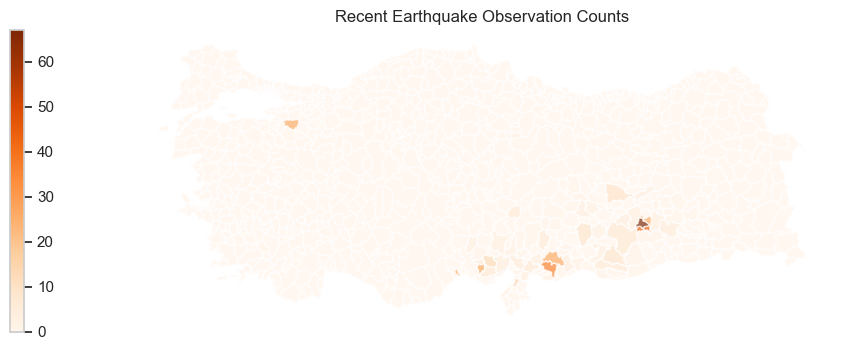

In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(12, 10))
# gdf.plot(column = 'mean_of_me', ax=ax, alpha =0.4)
gdf.plot(column="observation_id", ax=ax, cmap="Oranges", alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

sm = plt.cm.ScalarMappable(
    cmap="Oranges",
    norm=plt.Normalize(
        vmin=gdf["observation_id"].min(), vmax=gdf["observation_id"].max()
    ),
)


divider = make_axes_locatable(ax)
dvider_kwargs = dict(position="left", size="1.5%", pad=0)
fig.colorbar(
    sm,
    cax=divider.append_axes(**dvider_kwargs),
    # format = matplotlib.ticker.FuncFormatter(lambda x, pos: ''),
    # ticks = matplotlib.ticker.FixedLocator([])
)

ax.set_title("Recent Earthquake Observation Counts")

# plt.savefig('../images/recent_earthquake_observations.png')

In [78]:
displacement["idp_color"] = displacement["idp_color"].str.replace("_", " ")

### Change in Displcement of IDPs/refugees

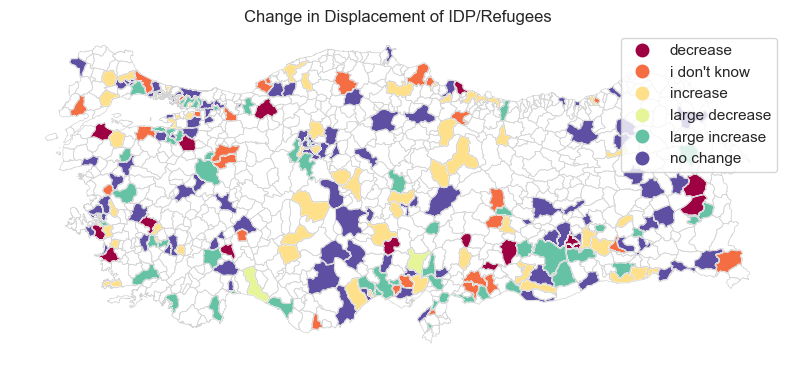

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))

turkey_adm2.boundary.plot(ax=ax, edgecolor="#D3D3D3", linewidth=0.5)
displacement.plot(column="idp_color", ax=ax, legend=True, cmap="Spectral")

ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# ax.legend(loc='upper right')
ax.set_title("Change in Displacement of IDP/Refugees")
plt.show()
# plt.legend()

### Food availability

In [95]:
food_availability = community_needs[["adm2_en", "food_color", "geometry"]]
food_availability = food_availability[food_availability["food_color"] != "i_don_t_know"]
adm2 = food_availability[~(food_availability["food_color"].isna())]["adm2_en"].unique()

Text(0.5, 1.0, 'Change in Food Availability')

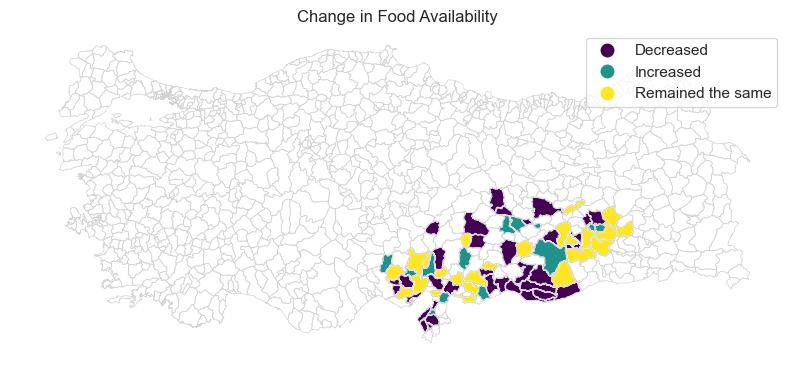

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))

turkey_adm2.boundary.plot(ax=ax, edgecolor="#D3D3D3", linewidth=0.5)
food_availability.plot(column="food_color", ax=ax, legend=True, cmap="viridis")

ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_title("Change in Food Availability")

# leg = ax.legend()
# leg.get_frame().set_alpha(0)

### Damage to key infrstructure of buildings

Interestingly, it was reported that there were damaged buildings even outside the earthquake impacted regions

Text(0.5, 1.0, 'Damage to key infrastructure or buildings')

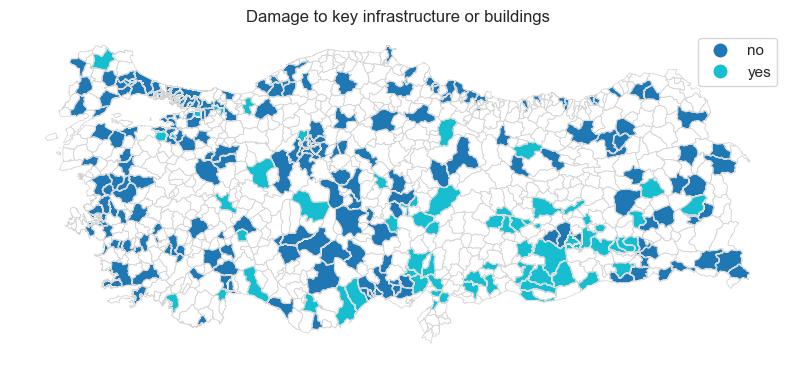

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))

turkey_adm2.boundary.plot(ax=ax, edgecolor="#D3D3D3", linewidth=0.5)
convert_to_gdf(recent_earthquake).plot(
    column="did_you_notice_any_damage_to_key_infrastructure_or_buildings_in_your_community_because_of_the_recent_earthquake",
    ax=ax,
    legend=True,
)

ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_title("Damage to key infrastructure or buildings")